###### importing liberies

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
%matplotlib inline

### General data information

In [2]:
df=pd.read_csv('insurance.csv')

In [3]:
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.tail(5)

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [7]:
print('rows : ',df.shape[0])
print('Columns : ',df.shape[1])

rows :  1338
Columns :  7


In [8]:
df.columns
print('data frame cloumns :',df.columns)

data frame cloumns : Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [10]:
#col=[ ]
for i in df.columns:
    print("="*40)
    print(i)
    print("*"*20)
    print(df[i].value_counts())

age
********************
18    69
19    68
20    29
51    29
45    29
46    29
47    29
48    29
50    29
52    29
28    28
54    28
21    28
27    28
26    28
49    28
25    28
24    28
23    28
22    28
53    28
42    27
44    27
43    27
41    27
40    27
31    27
30    27
29    27
56    26
34    26
33    26
32    26
57    26
55    26
35    25
59    25
58    25
36    25
39    25
38    25
37    25
60    23
61    23
62    23
63    23
64    22
Name: age, dtype: int64
sex
********************
male      676
female    662
Name: sex, dtype: int64
bmi
********************
32.300    13
28.310     9
30.800     8
34.100     8
28.880     8
          ..
44.745     1
26.070     1
27.300     1
37.715     1
29.200     1
Name: bmi, Length: 548, dtype: int64
children
********************
0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64
smoker
********************
no     1064
yes     274
Name: smoker, dtype: int64
region
********************
southeast    364
northwest

In [11]:
df.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


### Feature engineering

###### Missing values

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
Missing percentage
age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64


<AxesSubplot:>

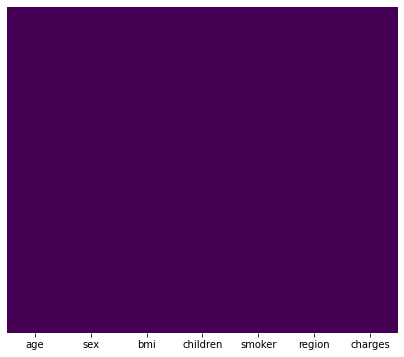

In [12]:
# to find th null data
fig=plt.figure(figsize=(7,6))
#sns.heatmap(df.isnull())
print(df.isnull().sum())
#percentage of missing values
print("Missing percentage")
print(df.isnull().sum()/len(df)*100)
# Heat map representaion of missing data
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [13]:
#missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
age,0,0.0
sex,0,0.0
bmi,0,0.0
children,0,0.0
smoker,0,0.0
region,0,0.0
charges,0,0.0


###### Data balancing

For Regrsssion Problem No need of Data balancin

###### Categorical Encoding

#used label Encoding

### To find how many Labels found in each and every cloumn

In [14]:
for feature in df.columns[:]:
    if df[feature].dtypes=="object":
        print(feature,":",len(df[feature].unique()),'labels')

sex : 2 labels
smoker : 2 labels
region : 4 labels


In [15]:
lb=LabelEncoder()
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=lb.fit_transform(df[i])

In [16]:
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


###### outliers

In [17]:
#### If Features Are Skewed We Use the IRQ Technique
#### If Features Are in normal distribution we use the  z- score method

In [18]:
X=df[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
y=df['charges']

<AxesSubplot:>

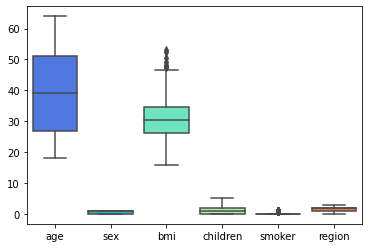

In [19]:
# Can do entire dataframe with orient='h'
sns.boxplot(data=X,palette='rainbow')#orient='h')#palette="coolwarm")#hue="smoker"

### Feature Selection

###### Correlation

In [20]:
import statsmodels.api as sm

In [21]:
X = sm.add_constant(X)
## fit a OLS model for analyzation
model= sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     668.1
Date:                Tue, 13 Jul 2021   Prob (F-statistic):               0.00
Time:                        19:31:01   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1331   BIC:                         2.715e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.182e+04    955.130    -12.371      0.000   -1.37e+04   -9941.729
age          257.2881     11.886     21.647      0.000     233.971     280.605
sex         -131.1106    332.811     -0.394      0.694    -784.001     521.780
bmi          332.5701     27.722     11.997      0.000     278.186     386.954
children     479.3694    137.644      3.483      0.001     209.346     749.393
smoker      2.382e+04    411.843     57.839      0.000     2.3e+04    2.46e+04
region      -353.6400    151.927     -2.328      0.020    -651.682     -55.598
==============================================================================
Omnibus:                      299.003   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              713.975
Skew:                           1.207   Prob(JB):                    9.17e-156
Kurtosis:                       5.642   Cond. No.                         296.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Training and Testing Data


In [22]:
from sklearn.linear_model import LinearRegression

In [28]:
#scores = cross_val_score(lm, X_train, y_train, scoring='r2', cv=folds)
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
model = LinearRegression()
# evaluate model
scores = cross_val_score(model, X, y,cv=cv, n_jobs=-1,scoring='r2') # scoring='accuracy' for classification method
print(scores)
scores.mean()

[0.72781153 0.79523865 0.69016122 0.72214159 0.76074313 0.71582832
 0.74050005 0.77344592 0.70471258 0.81381372]


0.7444396710808198